In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [144]:
data = pd.read_csv("../ml_src/algo/final.csv", index_col=0)

In [145]:
data.head()

,text,y
0,urgent business assistance and partnershipdear...,1
1,i am mr ben suleman a custom officer and work ...,1
2,his royal majesty hrm crown ruler of eleme ki...,1
3,his royal majesty hrm crown ruler of eleme ki...,1
4,it is with a heart full of hope that i write t...,1


# Fraudulent

In [146]:
data.iloc[1800].text

'hello dear friendci am mre anijah akpunduc an accountant officer with citi bankcplc here in dakar sengale i gathered your informationmy countrys international chamber of trade andmercec the business i am about to introduce is basedon sheer trust and with a sense of purposeei am contacting you to assist in repatriating the sum of 15e2mues dollarsethe money and property left behind by dresolomon who died accidentally on the 21st of april 2000c dr solomon komanac his wife and their two children were killed by rebels on the past crisis in liberia during the time of their formal president charles taylor near their village called kuru ei gathered all this information through a good source after my several routine note to his forwarding addresse because he had served here in dakar senegal as a business consultant with the senegalaise national petroleumgas corperationesnpgc and a special ass advise to the opecesince then i have made several enquiries to his embassy here in dakar senegal to lo

# Non-Fraudulent

In [147]:
data.iloc[20000].text

'i will be out of the office the week of thanksgiving'

# TF-IDF

In [148]:
stop_words = []

with open('../ml_src/algo/stop_words.txt', 'r') as f:
    for _ in range(127):
        tmp = f.readline()
        tmp = tmp.replace('\n', '')
        stop_words.append(tmp)

In [149]:
X, y = data['text'], data['y']

In [150]:
tfidf = TfidfVectorizer(max_df=0.01, stop_words=stop_words)

In [151]:
X = np.array(X, dtype='U')

In [152]:
tfidf.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.01, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', '...'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [153]:
tfidf.stop_words_

{'attached',
 'calendar',
 'call',
 'credit',
 'date',
 'deal',
 'dear',
 'dont',
 'draft',
 'email',
 'enron',
 'file',
 'find',
 'following',
 'gas',
 'get',
 'go',
 'going',
 'good',
 'hey',
 'hi',
 'im',
 'know',
 'last',
 'let',
 'like',
 'list',
 'may',
 'meeting',
 'need',
 'new',
 'office',
 'one',
 'per',
 'please',
 'received',
 'report',
 'revised',
 'schedule',
 'see',
 'send',
 'sent',
 'start',
 'thanks',
 'think',
 'time',
 'today',
 'us',
 'want',
 'week',
 'would'}

In [154]:
X_tf = tfidf.transform(X)

# Validation curve

In [155]:
def plot_val_curve(param_name, param_range):
    train_score, test_score = validation_curve(
        BernoulliNB(),
        X_tf, y,
        param_name=param_name,
        param_range=param_range,
        cv=10,
        scoring='recall'
    )
    
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    
    plt.plot(param_range, train_score_mean, c='k', label='train')
    plt.plot(param_range, test_score_mean, c='r', label='test')
    plt.ylabel('recall')
    plt.legend()

/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/victor/Documents/FraudDetection/.venv/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: Use

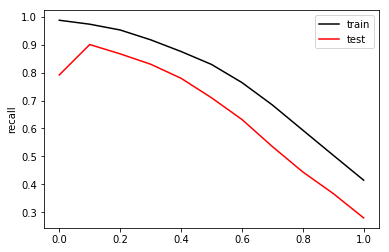

In [156]:
plot_val_curve('alpha', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Learning-curve

In [157]:
def plot_learning_curve():
    train_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    
    train_size, train_score, test_score = learning_curve(
        BernoulliNB(alpha=0.1, binarize=0.0),
        X_tf, y,
        train_sizes=train_range,
        cv=10,
        scoring='recall'
    )
    
    train_score_mean = np.mean(train_score, axis=1)
    test_score_mean = np.mean(test_score, axis=1)
    
    plt.plot(train_size, train_score_mean, c='k', label='train')
    plt.plot(train_size, test_score_mean, c='r', label='test')
    #plt.xlim([0, 0.4])
    plt.ylabel('recall')
    plt.legend()

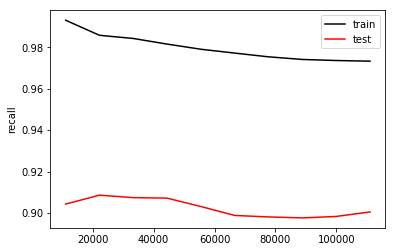

In [158]:
plot_learning_curve()

# Cross-validation (K=10)

In [159]:
results = cross_validate(BernoulliNB(alpha=0.1, binarize=0.0), X_tf, y, scoring='recall', cv=10)

In [160]:
np.mean(results['test_score']) # RECALL SCORE

0.9005000568246391

In [161]:
results = cross_validate(BernoulliNB(alpha=0.1, binarize=0.0), X_tf, y, scoring='accuracy', cv=10)

In [162]:
np.mean(results['test_score']) # ACCURACY SCORE

0.9371642300269285

# Classification Report

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.3)

In [164]:
clf = BernoulliNB(alpha=0.1, binarize=0.0)

In [165]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)

In [166]:
pred = clf.predict(X_test)

In [167]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99     35751
          1       0.69      0.91      0.79      1265

avg / total       0.99      0.98      0.98     37016



# ROC curve

In [168]:
y_scores = clf.predict_proba(X_test)

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

In [170]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

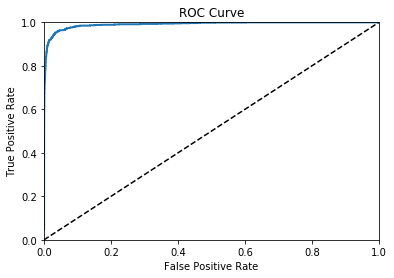

In [171]:
plot_roc_curve(fpr, tpr, label='NaiveBayes')

In [172]:
roc_auc_score(y_test, y_scores[:, 1])

0.9909658294198465